In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns; sns.set(style="ticks", color_codes=True)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_bf71b2aaab5e4141bd379fd5c105495e = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='4qPJVrD4ZRfknnVDE-q7JwH_FODU4qoX20F0_gzZBjP8',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_bf71b2aaab5e4141bd379fd5c105495e.get_object(Bucket='ibmhack-donotdelete-pr-oznyiafgasxlrr',Key='train.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

train = pd.read_csv(body)
train.head()
body = client_bf71b2aaab5e4141bd379fd5c105495e.get_object(Bucket='ibmhack-donotdelete-pr-oznyiafgasxlrr',Key='features.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

features = pd.read_csv(body)
features.head()
body = client_bf71b2aaab5e4141bd379fd5c105495e.get_object(Bucket='ibmhack-donotdelete-pr-oznyiafgasxlrr',Key='stores.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

stores = pd.read_csv(body)
stores.head()
body = client_bf71b2aaab5e4141bd379fd5c105495e.get_object(Bucket='ibmhack-donotdelete-pr-oznyiafgasxlrr',Key='test.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

test = pd.read_csv(body)
test.head()

from sklearn.feature_selection import RFE
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

In [2]:
train = train.merge(stores, how='left').merge(features, how='left')

# dataset["nextWeekHoliday"] = dataset["isHoliday"].shift(-1).fillna(False)
# dataset["next2WeekHoliday"] = dataset["isHoliday"].shift(-2).fillna(False)
train

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106
5,1,1,2010-03-12,21043.39,False,A,151315,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106
6,1,1,2010-03-19,22136.64,False,A,151315,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106
7,1,1,2010-03-26,26229.21,False,A,151315,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106
8,1,1,2010-04-02,57258.43,False,A,151315,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808
9,1,1,2010-04-09,42960.91,False,A,151315,65.86,2.770,NaN,NaN,NaN,NaN,NaN,210.622857,7.808


In [3]:
def scatter(train, column):
    plt.figure()
    plt.scatter(train[column] , train['Weekly_Sales'])
    plt.ylabel('weeklySales')
    plt.xlabel(column)

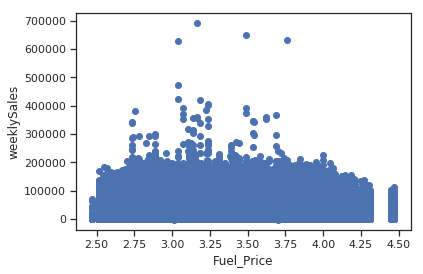

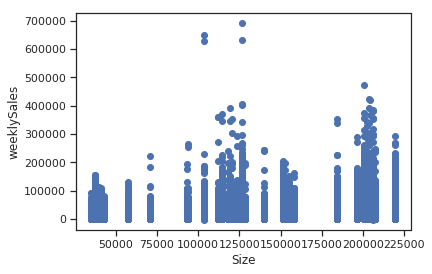

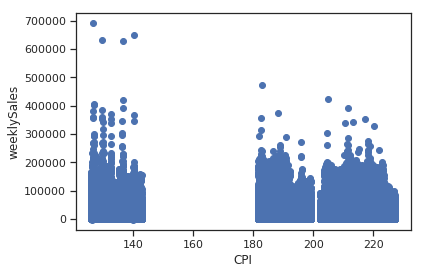

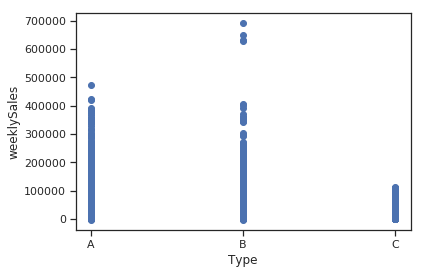

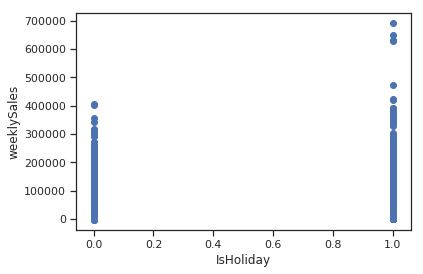

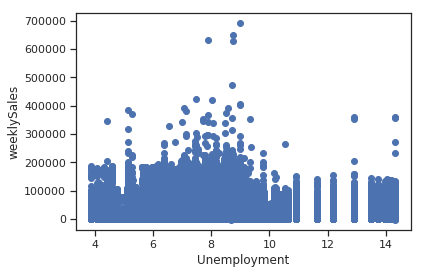

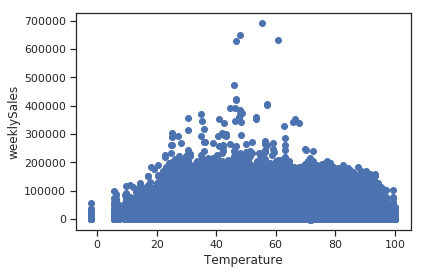

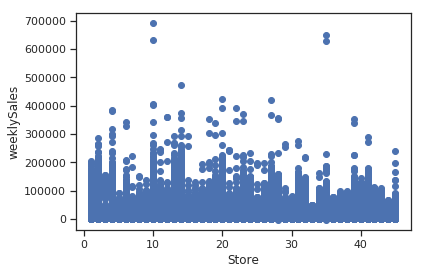

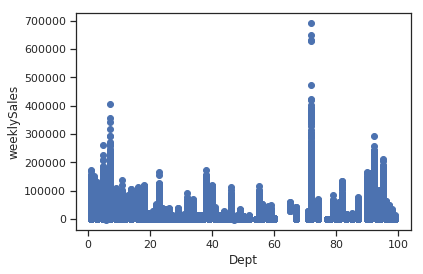

In [4]:
scatter(train,"Fuel_Price")
scatter(train,"Size")
scatter(train,'CPI')
scatter(train,'Type')
scatter(train,'IsHoliday')
scatter(train,'Unemployment')
scatter(train,'Temperature')
scatter(train,'Store')
scatter(train,'Dept')

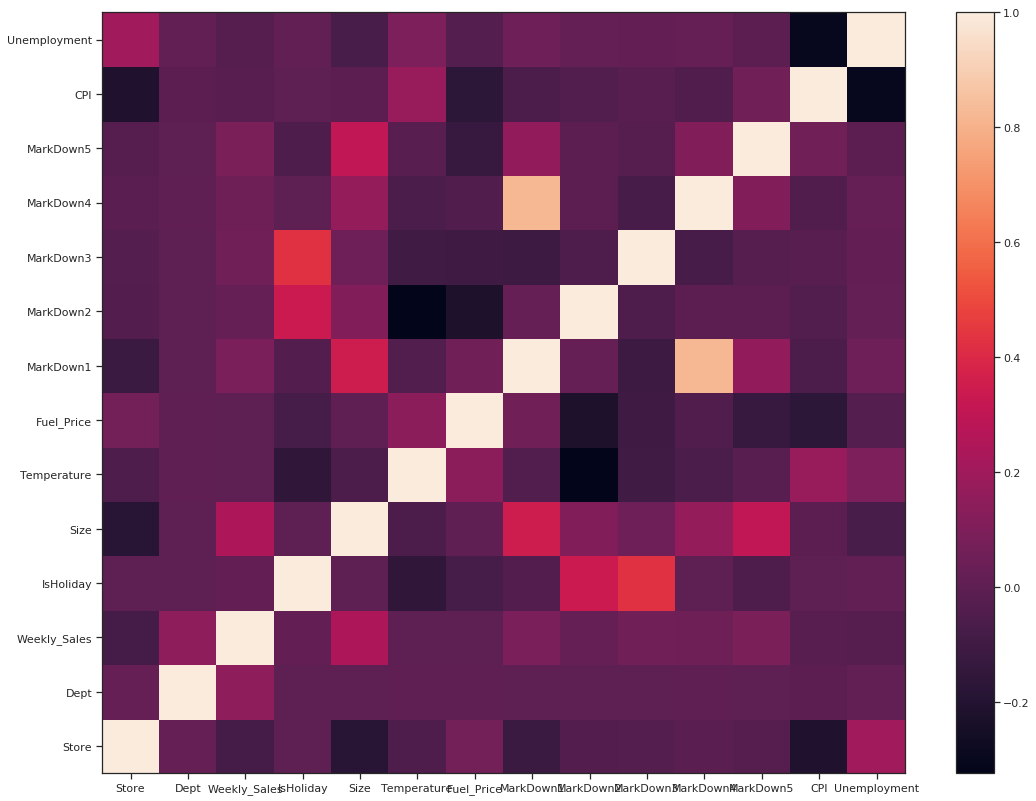

In [5]:
fig = plt.figure(figsize=(18, 14))
corr = train.corr()
c = plt.pcolor(corr)
plt.yticks(np.arange(0.5, len(corr.index), 1), corr.index)
plt.xticks(np.arange(0.5, len(corr.columns), 1), corr.columns)
fig.colorbar(c)

In [6]:
#sns.pairplot(train, vars=['Weekly_Sales', 'Fuel_Price', 'Size', 'CPI', 'Dept', 'Temperature', 'Unemployment'])

In [7]:
#sns.pairplot(train.fillna(0), vars=['Weekly_Sales', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'])

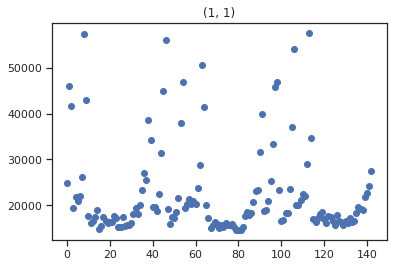

In [8]:
for name, group in train.groupby(["Store", "Dept"]):
    plt.title(name)
    plt.scatter(range(len(group)), group["Weekly_Sales"])
    plt.show()
    break

In [9]:
train=train.drop("Type", axis = 1)



# Data manipulation

In [10]:
#train["type"] = pd.get_dummies(train["Type"], drop_first=True)
train[['MarkDown1','MarkDown2','MarkDown3','MarkDown4', 'MarkDown5']] = train[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].fillna(0)
train['Month'] = pd.to_datetime(train['Date']).dt.month
train = train.drop(columns=["Date", "CPI", "Fuel_Price", 'Unemployment'])
train

,Store,Dept,Weekly_Sales,IsHoliday,Size,Temperature,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Month
0,1,1,24924.50,False,151315,42.31,0.00,0.00,0.00,0.00,0.00,2
1,1,1,46039.49,True,151315,38.51,0.00,0.00,0.00,0.00,0.00,2
2,1,1,41595.55,False,151315,39.93,0.00,0.00,0.00,0.00,0.00,2
3,1,1,19403.54,False,151315,46.63,0.00,0.00,0.00,0.00,0.00,2
4,1,1,21827.90,False,151315,46.50,0.00,0.00,0.00,0.00,0.00,3
5,1,1,21043.39,False,151315,57.79,0.00,0.00,0.00,0.00,0.00,3
6,1,1,22136.64,False,151315,54.58,0.00,0.00,0.00,0.00,0.00,3
7,1,1,26229.21,False,151315,51.45,0.00,0.00,0.00,0.00,0.00,3
8,1,1,57258.43,False,151315,62.27,0.00,0.00,0.00,0.00,0.00,4
9,1,1,42960.91,False,151315,65.86,0.00,0.00,0.00,0.00,0.00,4


# Algorithms

In [11]:
def knn():
    knn = KNeighborsRegressor(n_neighbors=10)
    return knn

def extraTreesRegressor():
    clf = ExtraTreesRegressor(n_estimators=100,max_features='auto', verbose=1, n_jobs=1)
    return clf

def randomForestRegressor():
    clf = RandomForestRegressor(n_estimators=100,max_features='log2', verbose=1)
    return clf

def svm():
    clf = SVR(kernel='rbf', gamma='auto')
    return clf

def nn():
    clf = MLPRegressor(hidden_layer_sizes=(10,),  activation='relu', verbose=3)
    return clf

def predict_(m, test_x):
    return pd.Series(m.predict(test_x))

def model_():
#     return knn()
    return extraTreesRegressor()
#     return svm()
#     return nn()
#     return randomForestRegressor()    

def train_(train_x, train_y):
    m = model_()
    m.fit(train_x, train_y)
    return m

def train_and_predict(train_x, train_y, test_x):
    m = train_(train_x, train_y)
    return predict_(m, test_x), m
#

In [12]:
def calculate_error(test_y, predicted, weights):
    return mean_absolute_error(test_y, predicted, sample_weight=weights)

# K-Fold Cross Validation

In [13]:
kf = KFold(n_splits=5)
splited = []
# dataset2 = dataset.copy()
for name, group in train.groupby(["Store", "Dept"]):
    group = group.reset_index(drop=True)
    trains_x = []
    trains_y = []
    tests_x = []
    tests_y = []
    if group.shape[0] <= 5:
        f = np.array(range(5))
        np.random.shuffle(f)
        group['fold'] = f[:group.shape[0]]
        continue
    fold = 0
    for train_index, test_index in kf.split(group):
        group.loc[test_index, 'fold'] = fold
        fold += 1
    splited.append(group)

splited = pd.concat(splited).reset_index(drop=True)

In [14]:
splited

,Store,Dept,Weekly_Sales,IsHoliday,Size,Temperature,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Month,fold
0,1,1,24924.50,False,151315,42.31,0.00,0.00,0.00,0.00,0.00,2,0.0
1,1,1,46039.49,True,151315,38.51,0.00,0.00,0.00,0.00,0.00,2,0.0
2,1,1,41595.55,False,151315,39.93,0.00,0.00,0.00,0.00,0.00,2,0.0
3,1,1,19403.54,False,151315,46.63,0.00,0.00,0.00,0.00,0.00,2,0.0
4,1,1,21827.90,False,151315,46.50,0.00,0.00,0.00,0.00,0.00,3,0.0
5,1,1,21043.39,False,151315,57.79,0.00,0.00,0.00,0.00,0.00,3,0.0
6,1,1,22136.64,False,151315,54.58,0.00,0.00,0.00,0.00,0.00,3,0.0
7,1,1,26229.21,False,151315,51.45,0.00,0.00,0.00,0.00,0.00,3,0.0
8,1,1,57258.43,False,151315,62.27,0.00,0.00,0.00,0.00,0.00,4,0.0
9,1,1,42960.91,False,151315,65.86,0.00,0.00,0.00,0.00,0.00,4,0.0


In [15]:
best_model = None
error_cv = 0
best_error = np.iinfo(np.int32).max
for fold in range(5):
    dataset_train = splited.loc[splited['fold'] != fold]
    dataset_test = splited.loc[splited['fold'] == fold]
    train_y = dataset_train['Weekly_Sales']
    train_x = dataset_train.drop(columns=['Weekly_Sales', 'fold'])
    test_y = dataset_test['Weekly_Sales']
    test_x = dataset_test.drop(columns=['Weekly_Sales', 'fold'])
    print(dataset_train.shape, dataset_test.shape)
    predicted, model = train_and_predict(train_x, train_y, test_x)
    weights = test_x['IsHoliday'].replace(True, 5).replace(False, 1)
    error = calculate_error(test_y, predicted, weights)
    error_cv += error
    print(fold, error)
    if error < best_error:
        print('Find best model')
        best_error = error
        best_model = model
error_cv /= 5

(335722, 13) (85552, 13)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.3s finished


0 2000.4819691004363
Find best model
(335849, 13) (85425, 13)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.1s finished


1 3322.254856392325
(335970, 13) (85304, 13)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.2s finished


2 1916.8604368242968
Find best model
(338733, 13) (82541, 13)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.2s finished


3 2354.7222323863584
(338822, 13) (82452, 13)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


4 1808.3928597997417
Find best model


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.1s finished


In [16]:
error_cv

2280.542470900632

In [17]:
best_error

1808.3928597997417

# Test part

In [18]:
test

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False
5,1,1,2012-12-07,False
6,1,1,2012-12-14,False
7,1,1,2012-12-21,False
8,1,1,2012-12-28,True
9,1,1,2013-01-04,False


In [19]:
test = test.merge(stores, how='left').merge(features, how='left')
test

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573
1,1,1,2012-11-09,False,A,151315,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573
2,1,1,2012-11-16,False,A,151315,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573
3,1,1,2012-11-23,True,A,151315,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573
4,1,1,2012-11-30,False,A,151315,52.34,3.207,2460.03,NaN,3838.35,150.57,6966.34,223.610984,6.573
5,1,1,2012-12-07,False,A,151315,64.12,3.198,6343.16,NaN,270.00,2928.90,10147.90,223.660021,6.573
6,1,1,2012-12-14,False,A,151315,48.89,3.168,3504.83,NaN,73.26,1636.80,2779.60,223.719277,6.573
7,1,1,2012-12-21,False,A,151315,56.02,3.098,8231.71,NaN,274.00,358.15,2834.02,223.839845,6.573
8,1,1,2012-12-28,True,A,151315,44.79,3.108,12659.55,37101.13,174.78,74.46,1208.86,223.960414,6.573
9,1,1,2013-01-04,False,A,151315,41.73,3.161,1214.08,25366.33,15.01,72.36,3940.02,224.080983,6.525


In [20]:
test=test.drop("Type", axis = 1)
test

,Store,Dept,Date,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2012-11-02,False,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573
1,1,1,2012-11-09,False,151315,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573
2,1,1,2012-11-16,False,151315,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573
3,1,1,2012-11-23,True,151315,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573
4,1,1,2012-11-30,False,151315,52.34,3.207,2460.03,NaN,3838.35,150.57,6966.34,223.610984,6.573
5,1,1,2012-12-07,False,151315,64.12,3.198,6343.16,NaN,270.00,2928.90,10147.90,223.660021,6.573
6,1,1,2012-12-14,False,151315,48.89,3.168,3504.83,NaN,73.26,1636.80,2779.60,223.719277,6.573
7,1,1,2012-12-21,False,151315,56.02,3.098,8231.71,NaN,274.00,358.15,2834.02,223.839845,6.573
8,1,1,2012-12-28,True,151315,44.79,3.108,12659.55,37101.13,174.78,74.46,1208.86,223.960414,6.573
9,1,1,2013-01-04,False,151315,41.73,3.161,1214.08,25366.33,15.01,72.36,3940.02,224.080983,6.525


In [21]:

test[['MarkDown1','MarkDown2','MarkDown3','MarkDown4', 'MarkDown5']] = test[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].fillna(0)
test = test.fillna(0)
column_date = test['Date']
test['Month'] = pd.to_datetime(test['Date']).dt.month
test = test.drop(columns=["Date", "CPI", "Fuel_Price", 'Unemployment'])
test

,Store,Dept,IsHoliday,Size,Temperature,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Month
0,1,1,False,151315,55.32,6766.44,5147.70,50.82,3639.90,2737.42,11
1,1,1,False,151315,61.24,11421.32,3370.89,40.28,4646.79,6154.16,11
2,1,1,False,151315,52.92,9696.28,292.10,103.78,1133.15,6612.69,11
3,1,1,True,151315,56.23,883.59,4.17,74910.32,209.91,303.32,11
4,1,1,False,151315,52.34,2460.03,0.00,3838.35,150.57,6966.34,11
5,1,1,False,151315,64.12,6343.16,0.00,270.00,2928.90,10147.90,12
6,1,1,False,151315,48.89,3504.83,0.00,73.26,1636.80,2779.60,12
7,1,1,False,151315,56.02,8231.71,0.00,274.00,358.15,2834.02,12
8,1,1,True,151315,44.79,12659.55,37101.13,174.78,74.46,1208.86,12
9,1,1,False,151315,41.73,1214.08,25366.33,15.01,72.36,3940.02,1


In [22]:
#train

In [23]:
predicted_test = best_model.predict(test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.8s finished


In [24]:
test.columns


Index(['Store', 'Dept', 'IsHoliday', 'Size', 'Temperature', 'MarkDown1',
       'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'Month'],
      dtype='object')

In [25]:
x=pd.DataFrame({"Store":[1], "Dept":[1], "IsHoliday":[False], "Size":[118221], "Temperature":[76.06], "MarkDown1":[212.02], "MarkDown2":[851.73], "MarkDown3":[2.06], "MarkDown4":[10.88], "MarkDown5":[1864.57], "Month":[7]})
pred=best_model.predict(x)
print(pred)

[14028.7152]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [26]:
#test['weeklySales'] = predicted_test
#est['Date'] = column_date
#test['id'] = test['Store'].astype(str) + '_' +  test['Dept'].astype(str) + '_' +  test['Date'].astype(str)
#test = test[['id', 'weeklySales']]
#test = test.rename(columns={'id': 'Id', 'weeklySales': 'Weekly_Sales'})

In [27]:
#test.to_csv('output.csv', index=False)

In [28]:
test

,Store,Dept,IsHoliday,Size,Temperature,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Month
0,1,1,False,151315,55.32,6766.44,5147.70,50.82,3639.90,2737.42,11
1,1,1,False,151315,61.24,11421.32,3370.89,40.28,4646.79,6154.16,11
2,1,1,False,151315,52.92,9696.28,292.10,103.78,1133.15,6612.69,11
3,1,1,True,151315,56.23,883.59,4.17,74910.32,209.91,303.32,11
4,1,1,False,151315,52.34,2460.03,0.00,3838.35,150.57,6966.34,11
5,1,1,False,151315,64.12,6343.16,0.00,270.00,2928.90,10147.90,12
6,1,1,False,151315,48.89,3504.83,0.00,73.26,1636.80,2779.60,12
7,1,1,False,151315,56.02,8231.71,0.00,274.00,358.15,2834.02,12
8,1,1,True,151315,44.79,12659.55,37101.13,174.78,74.46,1208.86,12
9,1,1,False,151315,41.73,1214.08,25366.33,15.01,72.36,3940.02,1


In [29]:
!pip install watson-machine-learning-client

In [30]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

2020-07-06 13:07:38,679 - watson_machine_learning_client.metanames - WARNING - 'AUTHOR_EMAIL' meta prop is deprecated. It will be ignored.
2020-07-06 13:19:33,955 - watson_machine_learning_client.wml_client_error - WARNING - Deployment creation failed. Error: 402. {"trace":"-1htkt9rutypqk","errors":[{"code":"deployments_plan_limit_reached","message":"Current plan 'lite' only allows 5 deployments"}]}


In [31]:
wml_credentials={
  "apikey": "r-EFXqmsnOjn3JHm7OttSO1AYF-oWI8xfHeEfaCJk9p0",
  "instance_id": "94d0e4a5-dcbb-4393-a834-4e0a6d7a407c",
  "url": "https://eu-gb.ml.cloud.ibm.com"
}

In [32]:
client = WatsonMachineLearningAPIClient( wml_credentials )

In [33]:
model_props = {client.repository.ModelMetaNames.AUTHOR_NAME: "Vinny", 
               client.repository.ModelMetaNames.AUTHOR_EMAIL: "vinnychamoli@gmail.com", 
               client.repository.ModelMetaNames.NAME: "WareHouseManagement"}

In [34]:
model_artifact =client.repository.store_model(best_model, meta_props=model_props)

In [35]:
published_model_uid = client.repository.get_model_uid(model_artifact)

In [36]:
published_model_uid


'0c7c6076-98d4-4085-8dba-bcee6b63af19'

In [40]:
deployment = client.deployments.create(published_model_uid, name="test")



#######################################################################################

Synchronous deployment creation for uid: '0c7c6076-98d4-4085-8dba-bcee6b63af19' started

#######################################################################################


INITIALIZING
DEPLOY_IN_PROGRESS...................................
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='d5512c7c-0701-42af-b260-478eabbc5288'
------------------------------------------------------------------------------------------------




In [38]:
client.deployments.list()

------------------------------------  ------------------  ------  --------------  ------------------------  -----------------  -------------
GUID                                  NAME                TYPE    STATE           CREATED                   FRAMEWORK          ARTIFACT TYPE
76357b49-bb55-4dbc-b808-e747f2f81804  test                online  DEPLOY_SUCCESS  2020-07-05T17:06:31.124Z  scikit-learn-0.20  model
57565efd-6371-4906-82b7-f707fd264cd1  LifeData            online  DEPLOY_SUCCESS  2020-06-04T11:27:29.523Z  scikit-learn-0.20  model
a7cd5be6-9a8a-4229-9ba8-c922f72f06e3  LifeData            online  DEPLOY_SUCCESS  2020-06-03T01:54:46.221Z  scikit-learn-0.20  model
84f2f280-5297-4833-bde2-2f3ddcc7bff2  LifeExpectancyData  online  DEPLOY_SUCCESS  2020-06-02T14:30:58.178Z  scikit-learn-0.20  model
d24ee043-81d3-47f3-9177-50cddca185ab  LifeExpectancyData  online  DEPLOY_SUCCESS  2020-06-02T04:59:54.136Z  scikit-learn-0.20  model
------------------------------------  ---------------

In [39]:
client.deployments.delete('a7cd5be6-9a8a-4229-9ba8-c922f72f06e3')

'SUCCESS'

In [41]:
scoring_endpoint = client.deployments.get_scoring_url(deployment)


In [42]:
scoring_endpoint

'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/94d0e4a5-dcbb-4393-a834-4e0a6d7a407c/deployments/d5512c7c-0701-42af-b260-478eabbc5288/online'

In [ ]:
test.columns